# Real Time Meeting Summarizer

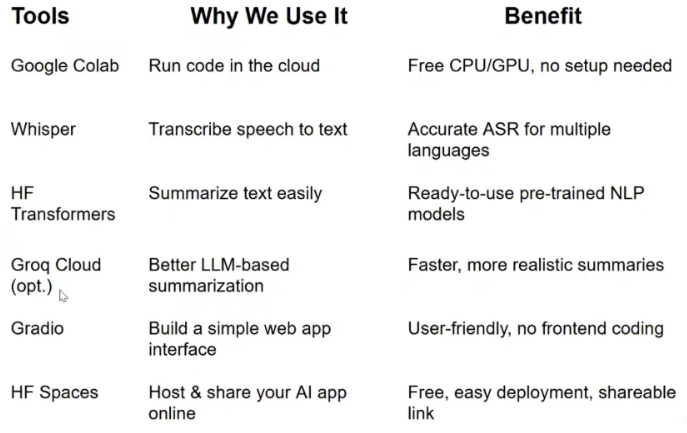

## Individual Features Testing

Install necessary libraries

In [ ]:
!pip install -q openai-whisper
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q transformers
!pip install -q groq
!pip install -q datasets
!pip install -q gradio gtts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 35.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.1 MB

Extract GroqAPI Secret Key

In [ ]:
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get('ChatBot_using_GroqAPI')

Upload Audio File into Colab

In [ ]:

from google.colab import files
uploaded = files.upload()
# Upload an audio file like "meeting.mp3"

Saving Special Meeting Audio File - April 29, 2025.mp3 to Special Meeting Audio File - April 29, 2025.mp3


Run Speech-to-Text (STT) using Whisper

In [ ]:
import whisper

model = whisper.load_model("base")

filename = 'Special Meeting Audio File - April 29, 2025.mp3'

result = model.transcribe(filename)
print("Transcript:\n", result["text"])


Transcript:
  I'll start again. This is the meeting for the Armour Springfield special meeting to discuss our 2025 financial plan. Today's date is April 29th at 2025 and the time is exactly 6 p.m. I'm Mayor Patrick Terriam for the Armour Springfield. All council is present to my right. The sending order is a Glen Fuel, Andy Kaczynski, Mark Miller and Melinda Warren. If I can get a adoption of the agenda there, move on to seconder please. Melinda and Glen, in addition to council at all. I see none. If I can get a mover or those in support of the adoption of the agenda. Andy, that would be unanimous and is there for or past. We'll get into 4.1 that's adoption of the 2025 financial plan. Can they get a mover and a seconder for that as well please. Melinda and Patrick. Thank you for the presentation. Council of the Armour Springfield adopt the 2025 financial plan consisting of one and operating budget to a capital budget, three an estimate of operating revenue and expenditures for the foll

Summarizing Text using GroqAPI

In [ ]:
import requests

def summarize_with_groq(text):
    api_key = os.getenv("GROQ_API_KEY")
    if not api_key:
        return "❌ API key not found."

    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }

    data = {
        "model": "llama3-8b-8192",
        "messages": [
            {"role": "system", "content": "You are a professional meeting summarizer."},
            {"role": "user", "content": f"Summarize this meeting:\n{text}"}
        ],
        "temperature": 0.4
    }

    response = requests.post(url, headers=headers, json=data)
    response.raise_for_status()

    return response.json()["choices"][0]["message"]["content"]

# Run summarization
summary = summarize_with_groq(result["text"])
print("📌 Summary:\n", summary)


📌 Summary:
 The meeting was a special meeting of the Council of Armour Springfield to discuss the 2025 financial plan. The meeting was chaired by Mayor Patrick Terriam, and all council members were present.

The main agenda item was the adoption of the 2025 financial plan, which consisted of an operating budget, a capital budget, an estimate of operating revenue and expenditures for the following fiscal year, and a five-year capital expenditure program.

Councillor Mark Miller expressed concerns about the budget, stating that it would result in an 18% increase in municipal taxes for some residents. He also questioned the lack of public engagement mechanisms, as the public hearing was not well-advertised and there was no opportunity for the public to question council members. Miller suggested that the council should set a goal of reducing expenditures going forward, rather than increasing them due to the influx of $2 million from the provincial reassessment.

Councillor Andy Kaczynski e

Running Text-to-Speech (TTS) for final Output

In [ ]:
from gtts import gTTS
from IPython.display import Audio

tts = gTTS(summary)
tts.save("summary.mp3")

# Play the audio summary
Audio("summary.mp3")

## Gradio UI for Real Time Meeting Summarizer

Cleaned Functional Code

In [ ]:
# 🔧 Install (skip if already installed)
!pip install -q openai-whisper git+https://github.com/openai/whisper.git
!pip install -q transformers groq datasets gradio gtts

In [ ]:
import os
import whisper
import requests
import tempfile
from gtts import gTTS
from google.colab import userdata
import gradio as gr

# 🔐 Load Groq API key from Colab secrets
os.environ["GROQ_API_KEY"] = userdata.get("ChatBot_using_GroqAPI")

# 📥 Load Whisper model
whisper_model = whisper.load_model("base")

# 📝 Transcribe audio
def transcribe_audio(audio_path):
    result = whisper_model.transcribe(audio_path)
    return result["text"]

# 🧠 Summarize text using Groq
def summarize_text(text):
    api_key = os.getenv("GROQ_API_KEY")
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }
    data = {
        "model": "llama3-8b-8192",
        "messages": [
            {"role": "system", "content": "You are a professional meeting summarizer."},
            {"role": "user", "content": f"Summarize this meeting:\n{text}"}
        ],
        "temperature": 0.4
    }
    response = requests.post(url, headers=headers, json=data)
    response.raise_for_status()
    return response.json()["choices"][0]["message"]["content"]

# 🔊 Convert summary to audio (basic speed toggle)
def speak(text, speed_mode="Normal"):
    slow = True if speed_mode == "Slow" else False
    tts = gTTS(text, lang="en", slow=slow)
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
        tts.save(fp.name)
        return fp.name

# 🔄 Full processing pipeline
def process(audio, speed_mode):
    if not audio:
        return "❌ No audio uploaded.", "", None
    transcript = transcribe_audio(audio)
    summary = summarize_text(transcript)
    audio_summary = speak(summary, speed_mode)
    return transcript, summary, audio_summary


Gradio UI

In [ ]:
gr.Interface(
    fn=process,
    inputs=[
        gr.Audio(label="🎙 Upload Meeting Audio", type="filepath"),
        gr.Radio(["Normal", "Slow"], label="⏩ Speech Speed", value="Normal")
    ],
    outputs=[
        gr.Textbox(label="📝 Transcript"),
        gr.Textbox(label="📌 Summary"),
        gr.Audio(label="🔊 Summary Audio")
    ],
    title="🧠 AI Meeting Summarizer",
    description="""
Upload your meeting recording to generate:
• A full transcript
• A smart summary
• A spoken version of the summary
    """,
    theme="default"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce4ebb64268a785ce5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Streamlit UI for Real Time Meeting Summarizer with Real-Time Input

In [ ]:
# 📦 Colab install cell for Streamlit-based real-time meeting summarizer
!pip install streamlit openai-whisper gTTS
!pip install git+https://github.com/stefanrmmr/streamlit_audio_recorder.git


  Cloning https://github.com/stefanrmmr/streamlit_audio_recorder.git to /tmp/pip-req-build-mv1t1jn7
  Running command git clone --filter=blob:none --quiet https://github.com/stefanrmmr/streamlit_audio_recorder.git /tmp/pip-req-build-mv1t1jn7
  Resolved https://github.com/stefanrmmr/streamlit_audio_recorder.git to commit 777d18114130137d492c0378a86631fff1ff1be5
  Preparing metadata (setup.py) ... done


In [ ]:
# ✅ Colab Cell 1: Extract API key from secret (should run separately before app)
from google.colab import userdata
import os
os.environ['GROQ_API_KEY'] = userdata.get("ChatBot_using_GroqAPI")

In [ ]:
# ✅ Step 3: Save the final app.py
%%writefile app.py
import streamlit as st
import os
import time
import whisper
import requests
import tempfile
from gtts import gTTS
from streamlit_audiorec import st_audiorec

# 🔐 Load API Key from environment
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

# Load Whisper model
model = whisper.load_model("base")

# UI Setup
st.set_page_config(page_title="🧠 Real-Time Meeting Summarizer", layout="centered")
st.title("🧠 Real-Time Meeting Summarizer")
st.markdown("🎙️ Record your meeting and get instant transcript, summary, and audio playback.")

# Status Log
if "log" not in st.session_state:
    st.session_state.log = []

def log(msg):
    ts = time.strftime("%H:%M:%S")
    st.session_state.log.append(f"🕒 {ts} - {msg}")

# Audio Recorder Component
audio_bytes = st_audiorec()

if audio_bytes:
    log("⏹️ Recording stopped")
    st.success("✅ Audio captured. Processing...")

    # Save to temp file
    with tempfile.NamedTemporaryFile(delete=False, suffix=".wav") as f:
        f.write(audio_bytes)
        audio_path = f.name

    # Transcribe
    result = model.transcribe(audio_path)
    transcript = result["text"]

    # Summarize via Groq
    def summarize(text):
        headers = {
            "Authorization": f"Bearer {GROQ_API_KEY}",
            "Content-Type": "application/json"
        }
        data = {
            "model": "llama3-8b-8192",
            "messages": [
                {"role": "system", "content": "You are a helpful assistant summarizing meeting notes."},
                {"role": "user", "content": f"Summarize this meeting:\n\n{text}"}
            ],
            "temperature": 0.3
        }
        response = requests.post("https://api.groq.com/openai/v1/chat/completions", headers=headers, json=data)
        return response.json()['choices'][0]['message']['content']

    summary = summarize(transcript)

    # TTS
    tts = gTTS(summary)
    summary_audio = tempfile.NamedTemporaryFile(delete=False, suffix=".mp3")
    tts.save(summary_audio.name)

    # Outputs
    st.subheader("🎧 Download Meeting Recording")
    with open(audio_path, "rb") as f:
        st.download_button("⬇️ Download Audio (.wav)", f.read(), file_name="meeting.wav")

    st.subheader("📄 Transcript")
    st.text_area("Transcript", transcript, height=300)
    st.download_button("📋 Download Transcript", transcript, file_name="transcript.txt")

    st.subheader("📝 Summary")
    st.text_area("Summary", summary, height=200)
    st.download_button("📋 Download Summary", summary, file_name="summary.txt")

    st.subheader("🔊 Audio Summary")
    with open(summary_audio.name, "rb") as f:
        audio_bytes = f.read()
        st.audio(audio_bytes, format="audio/mp3")
        st.download_button("⬇️ Download Summary Audio", audio_bytes, file_name="summary.mp3")

# Show log
with st.expander("📋 Status Log"):
    for entry in st.session_state.log:
        st.markdown(entry)

Overwriting app.py


In [ ]:
# Step 1: Check public IP (optional)
!wget -q -O - ipv4.icanhazip.com

# Step 2: Launch app
!streamlit run app.py & npx localtunnel --port 8501


34.16.187.234


⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.187.234:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://quick-towns-kiss.loca.lt
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  128 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:669 in code_to_exec                                                               
                                                                                        
  /content/app.py:8 in <module>                                                         
                                       

### 🛑 streamlit-mic-recorder only works on client-side (browser) using JavaScript/HTML5 APIs — and Colab doesn’t provide direct access to a browser frontend like that.

When I run:

**!streamlit run app.py & npx localtunnel --port 8501**


It launches the backend server in Colab. You then access the frontend via a localtunnel URL (e.g. https://odd-geckos-kiss.loca.lt). However:

Colab’s virtual browser session isn't your actual browser, so client-side JavaScript (like mic recording) can't access your physical mic directly.


### ✅ Run on Hugging Face Spaces (Publicly)
If you want to deploy this, Hugging Face Spaces (with Streamlit template) supports mic input fine